In [1]:
import matplotlib.pyplot as plt

In [2]:
import import_ipynb
import networkx as nx
import scipy as sp
import numpy as np

importing Jupyter notebook from data.ipynb


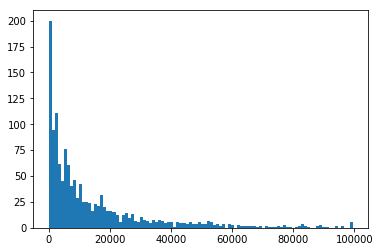

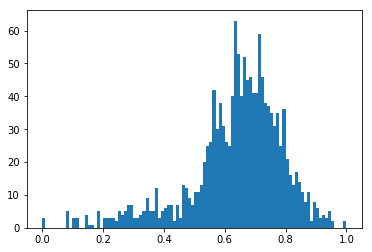

In [3]:
from data import df_normalized, april, state_list, features

In [4]:
subset = df_normalized[['ORIGIN_STATE_ABR', 'DEST_STATE_ABR', 'PASSENGERS_NORMALIZED']]
tuples = [tuple(x) for x in subset.values]

In [6]:
#create flight network
G = nx.DiGraph()
G.add_nodes_from(tuples)
G.add_weighted_edges_from(tuples)

In [6]:
# draw flight network
# plt.figure(figsize = (40,40))
# nx.draw_networkx(G, node_size = 10, with_labels = True)

In [7]:
#lack VI population data from CensGov. Hence removed VI node.
#lack covid 19 cases data and population data for Trust Territory of Pacific Islands. Hence removed TT node.
G.remove_node('VI')
G.remove_node('TT')

In [8]:
nx.set_node_attributes(G, april['infect_rate'], 'rate')

In [10]:
# the node attr shows the count of positive covid 19 cases by the end of March. first key be the name of the state abrev
# second key be the attribute name 'cases'. 

In [10]:
A = nx.to_scipy_sparse_matrix(G, nodelist = state_list)

[[0.86709722 0.         0.         ... 0.         0.         0.        ]
 [0.         0.11830072 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.37793476 0.         0.        ]
 [0.         0.         0.         ... 0.         0.44221386 0.        ]
 [0.         0.         0.         ... 0.         0.         0.47585928]]


In [11]:
#labels: cases per 100,000 people
infect_rate = nx.get_node_attributes(G,'rate')
y = list(infect_rate.values())

[48.52743166859182, 105.07346280944842, 123.80219660128968, 256.27151513804415, 43.294874112914165, 143.91009909866457, 59.51058589001637, 214.1724118776193, 143.15184925716653, 156.8601012294731, 246.34037845153196, 417.60375245199566, 101.59651344223268, 359.62869354646625, 475.675179888928, 100.19942632038415, 1335.8417237190379, 162.26450868072916, 1564.608145521532, 357.4678903411025, 118.37907485247771, 96.86548237661756, 185.64776201658037, 107.85988752085953, 602.3282597594128, 123.21122137807563, 153.23137938286814, 91.43357381188794, 157.1932418181174, 226.46090261071862, 111.02002445350337, 264.92008058561373, 145.47007291352733, 902.5023275289108, 228.98719116549609, 42.38485447866629, 140.0148544344161, 195.61540274854113, 154.22059867740032, 276.8298293466748, 145.7286714298815, 138.29267965940016, 93.99421866441818, 776.9360503095543, 48.18871188034921, 81.46036488292025, 151.0615123360773, 813.7924654579507, 140.86786786305527, 62.38327547907622, 486.15475618322307]


In [12]:
#feature matrix
X = features
X.drop(columns = ['state'], inplace = True)

    infect_rate_march  march_inc_1  march_inc_2  pos_rate_sample
0           16.266942           33           83         0.018568
1           20.007403          179          766         0.080497
2           17.330483          196          305         0.067281
3           17.709165          337          932         0.106539
4           18.935913         1619         5380         0.078225
5           45.617649          560         1907         0.207687
6           87.734872          577         2510         0.285176
7           32.759478           75          228         0.216957
8           29.509627         1226         4926         0.088100
9           37.005213          880         2903         0.175485
10          14.408082           67          127         0.020007
11          15.752424          101          373         0.167460
12          23.222435           43          365         0.068779
13          47.301805         1376         4459         0.196089
14          32.069664    

In [16]:
X = X.to_numpy()